In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'/content/cs-training.csv')

data.head()
data.duplicated().value_counts()
data = data.drop_duplicates()

In [ ]:
def missingValues(data):
    return (data.isnull().sum()/data.shape[0]*100)

In [ ]:
NullData_NoOfDep = data[data['NumberOfDependents'].isnull()]
NullData_NoOfDep_desc = NullData_NoOfDep.describe()
NullData_NoOfDep_desc

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,0.0,3924.000000,3924.000000,3924.000000,3924.000000,0.0
mean,74510.281855,0.045617,10.745132,59.588940,0.908257,1083.812181,NaN,5.604230,0.834608,0.590979,0.812181,NaN
std,43703.084554,0.208679,237.699246,18.634168,8.679394,4186.731843,NaN,4.096353,8.679228,0.914455,8.678008,NaN
min,9.000000,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,36006.500000,0.000000,0.008474,48.000000,0.000000,21.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,74492.000000,0.000000,0.047458,61.000000,0.000000,358.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,112734.000000,0.000000,0.268155,74.000000,0.000000,1559.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,149966.000000,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


For all the missing values in No of dependents columns , monthly income is also missing.
This might mean - 1. These are a group of people who are not willing to provide these ingformation. 2. These are the group of people
who dont have any fixed monthly income.  3. This might be misinformation due to some reason.

In [ ]:
NullData_MonthlyIncome = data[data['MonthlyIncome'].isnull()]
NullData_MonthlyIncome = NullData_MonthlyIncome.describe()

In [ ]:
NullData_NoOfDep = data[data['NumberOfDependents'].isnull()]
data_NoOfDepNotNull = data[data['NumberOfDependents'].notnull()]

NullData_NoOfDep['NumberOfDependents'] = NullData_NoOfDep['NumberOfDependents'].fillna(0)
NullData_NoOfDep['MonthlyIncome'] = NullData_NoOfDep['MonthlyIncome'].fillna(0)

data_NoOfDepNotNull['MonthlyIncome'].agg(['mean','median','max','min'])

<ipython-input-6-74c97329c3c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NullData_NoOfDep['NumberOfDependents'] = NullData_NoOfDep['NumberOfDependents'].fillna(0)
<ipython-input-6-74c97329c3c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NullData_NoOfDep['MonthlyIncome'] = NullData_NoOfDep['MonthlyIncome'].fillna(0)


mean      6.670221e+03
median    5.400000e+03
max       3.008750e+06
min       0.000000e+00
Name: MonthlyIncome, dtype: float64

the choice between mean and median imputation should be guided by the characteristics of the data.
If the data is normally distributed or only slightly skewed, mean imputation may be suitable. However, if the data is heavily skewed or contains outliers, median imputation is a more robust choice. Additionally, consider exploring data and checking for potential outliers before making a decision.

In [ ]:
Q1 = data_NoOfDepNotNull['MonthlyIncome'].quantile(0.25)
Q3 = data_NoOfDepNotNull['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data_NoOfDepNotNull[(data_NoOfDepNotNull['MonthlyIncome'] < lower_bound) | (data_NoOfDepNotNull['MonthlyIncome'] > upper_bound)]
outliers

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
45,46,0,0.000603,70,0,0.177787,16800.0,12,0,1,0,2.0
127,128,0,0.000000,59,0,0.218854,19167.0,13,0,2,0,0.0
196,197,0,0.762159,44,4,0.224466,21000.0,5,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149861,149862,0,0.089997,61,0,0.095543,17499.0,3,0,1,0,0.0
149893,149894,0,0.000000,41,0,0.131958,25833.0,12,0,1,0,5.0
149906,149907,0,0.056999,62,0,0.116106,17750.0,18,0,1,0,3.0
149944,149945,0,0.291860,36,1,0.119287,24000.0,12,0,2,0,0.0


Since there is a considerable amount of outliers in the data, we will go forward with filling the missing values with median for data_NoOfDepNotNull['MonthlyIncome']

In [ ]:
data_NoOfDepNotNull['MonthlyIncome'] = data_NoOfDepNotNull['MonthlyIncome'].fillna(data_NoOfDepNotNull['MonthlyIncome'].median())

<ipython-input-8-9e705ee83826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_NoOfDepNotNull['MonthlyIncome'] = data_NoOfDepNotNull['MonthlyIncome'].fillna(data_NoOfDepNotNull['MonthlyIncome'].median())


In [ ]:
missingValues(data_NoOfDepNotNull)


Unnamed: 0                              0.0
SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [ ]:
#appending the dataframes after filling the missing values
new_data = NullData_NoOfDep.append(data_NoOfDepNotNull)
#percentage of 0s and 1s in the target variable
new_data['SeriousDlqin2yrs'].value_counts()/new_data.shape[0]

<ipython-input-10-a02bfe9a3ee3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = NullData_NoOfDep.append(data_NoOfDepNotNull)


0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

0    0.933001 | 1    0.066999 | data is highly skewed. Our results would be biased.

<ipython-input-11-9455db043bac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[i], ax=axes[0])
<ipython-input-11-9455db043bac>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[i], ax=axes[1])
<ipython-input-11-9455db043bac>:10: UserWarning: 

`distplot` is a deprecated func

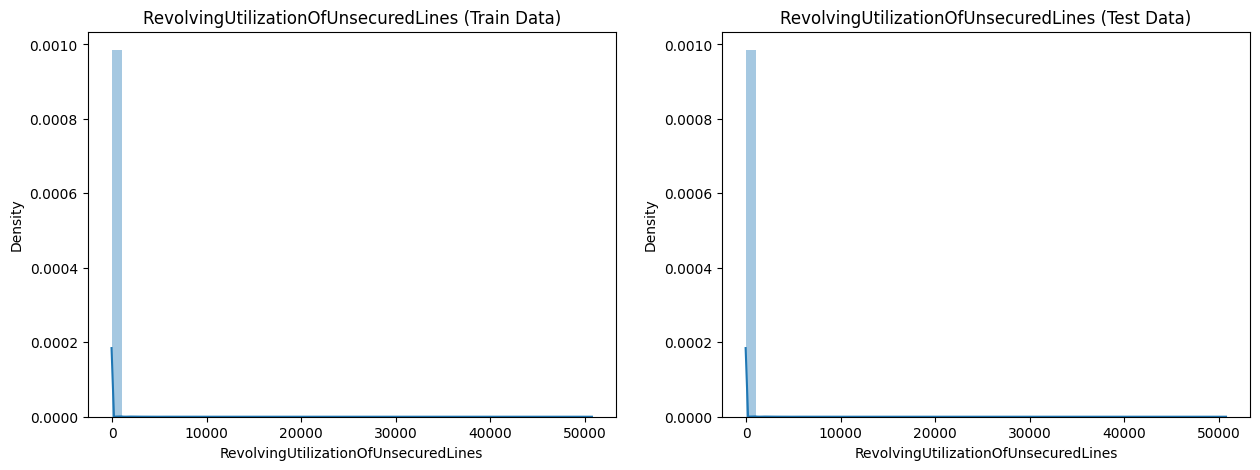

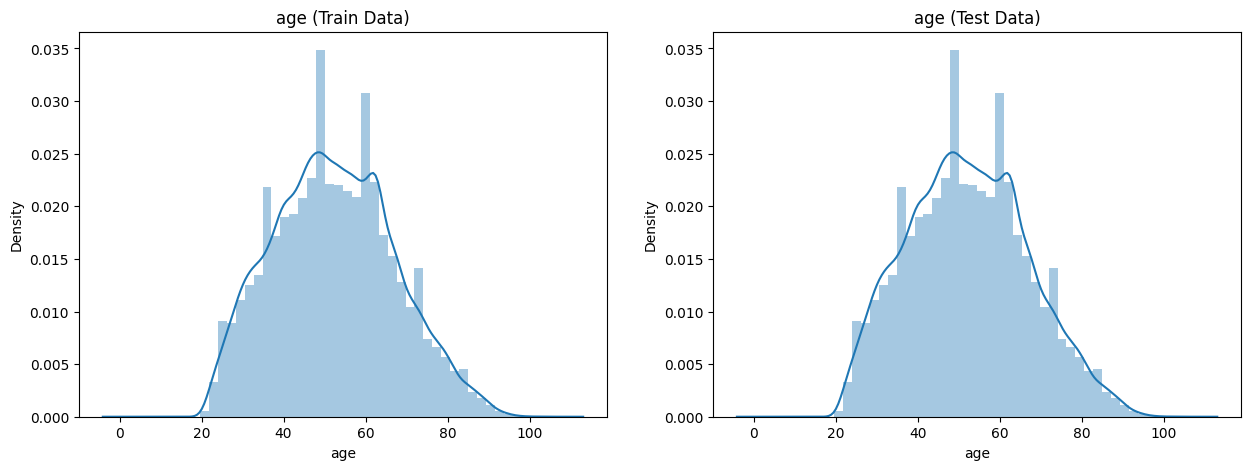

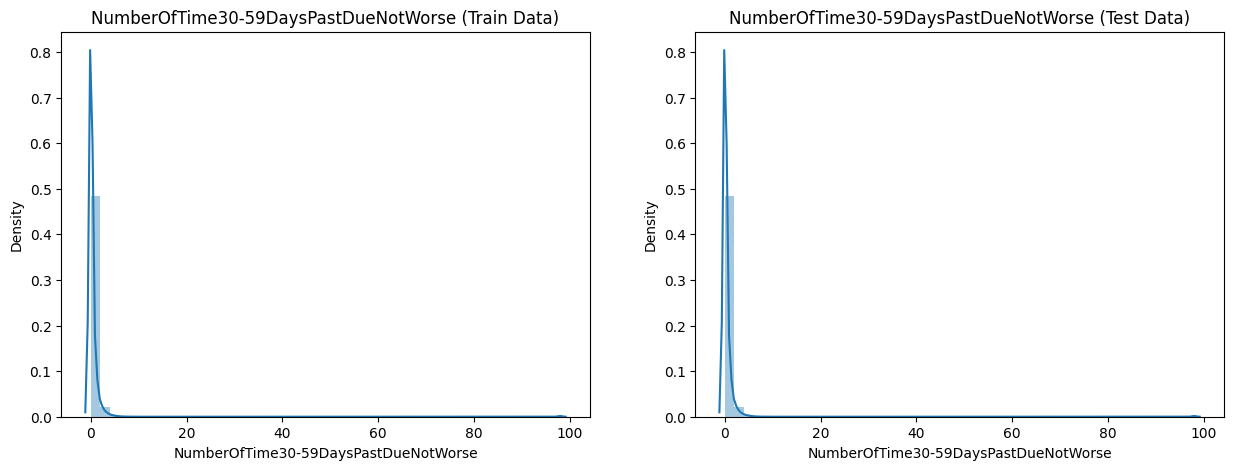

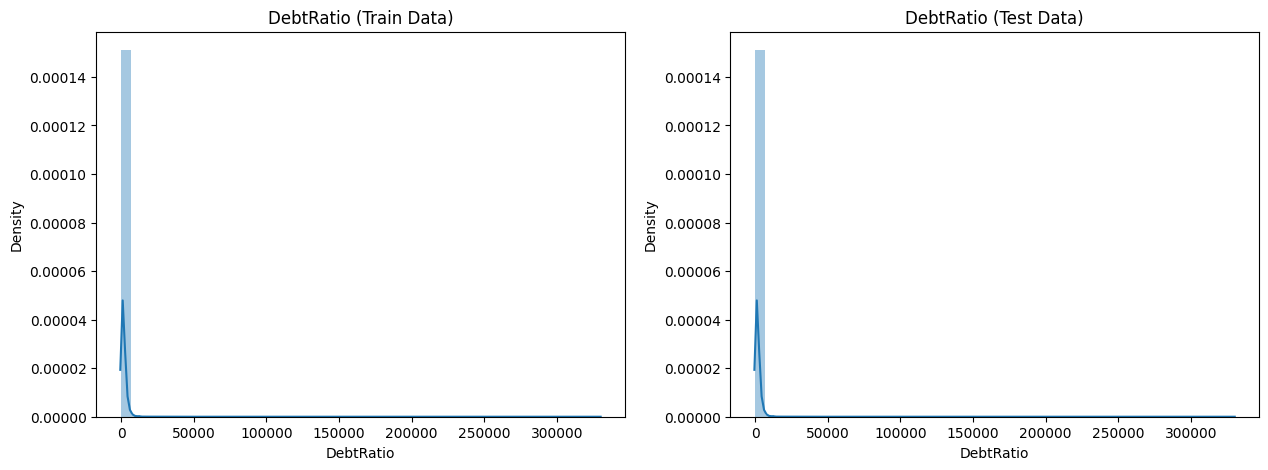

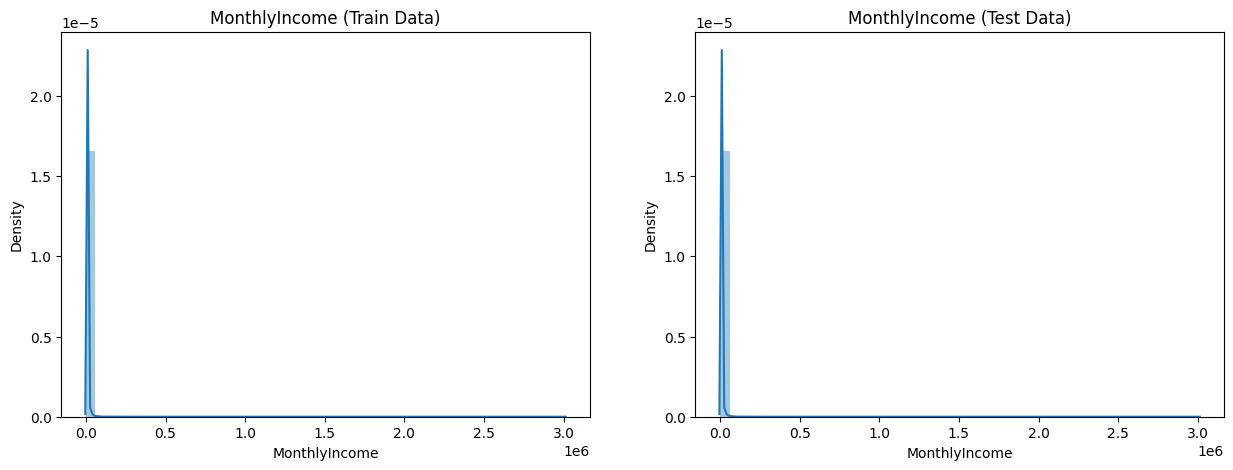

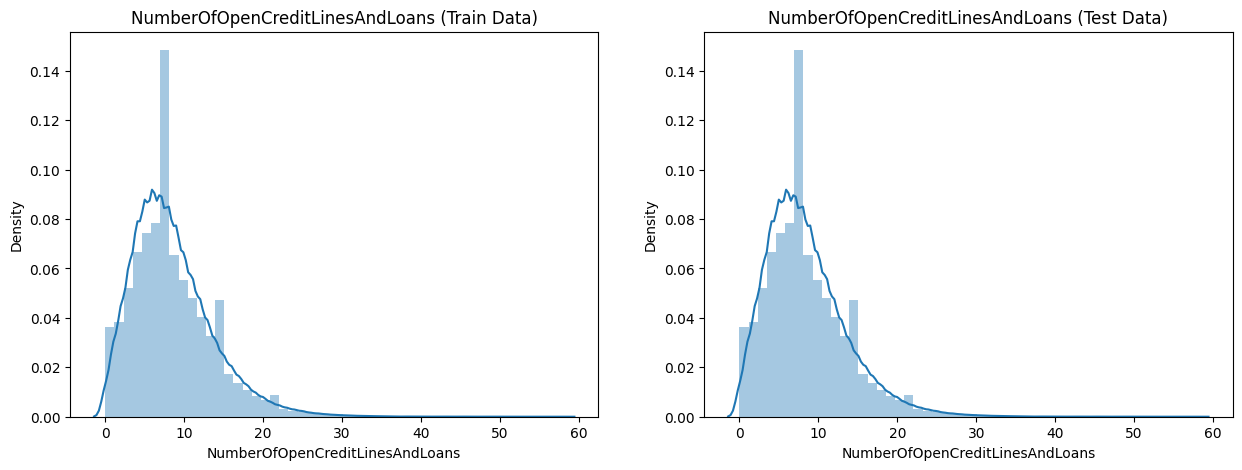

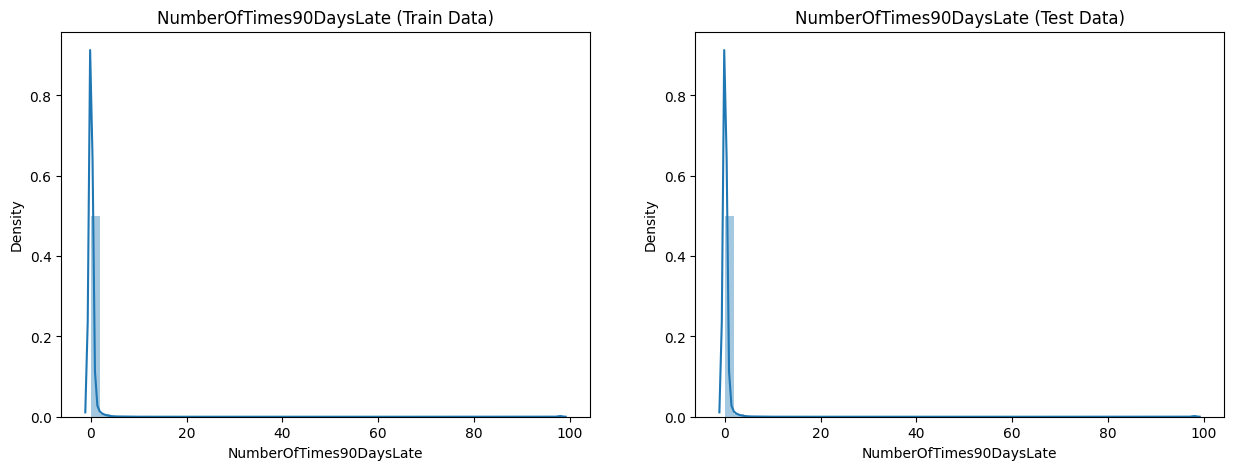

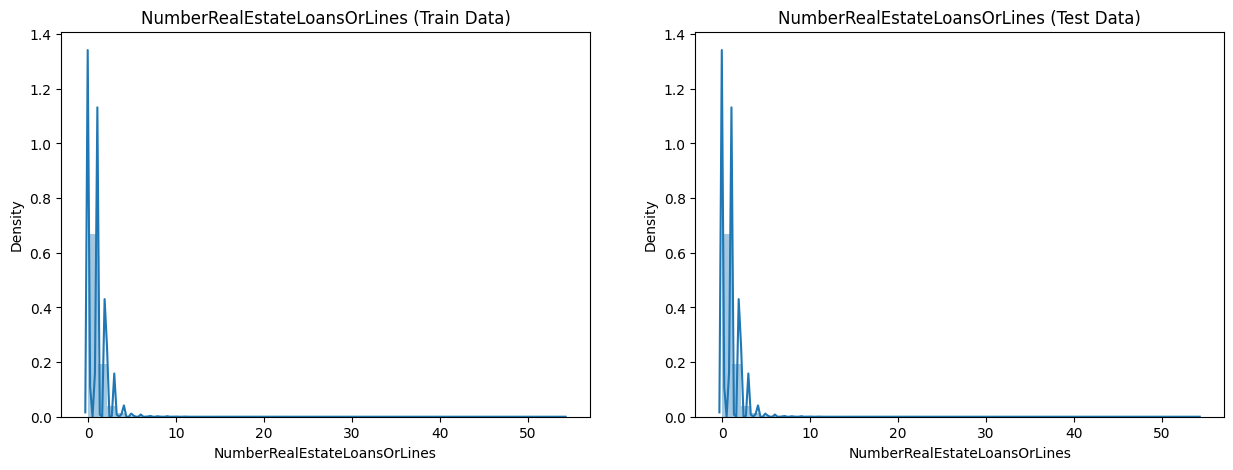

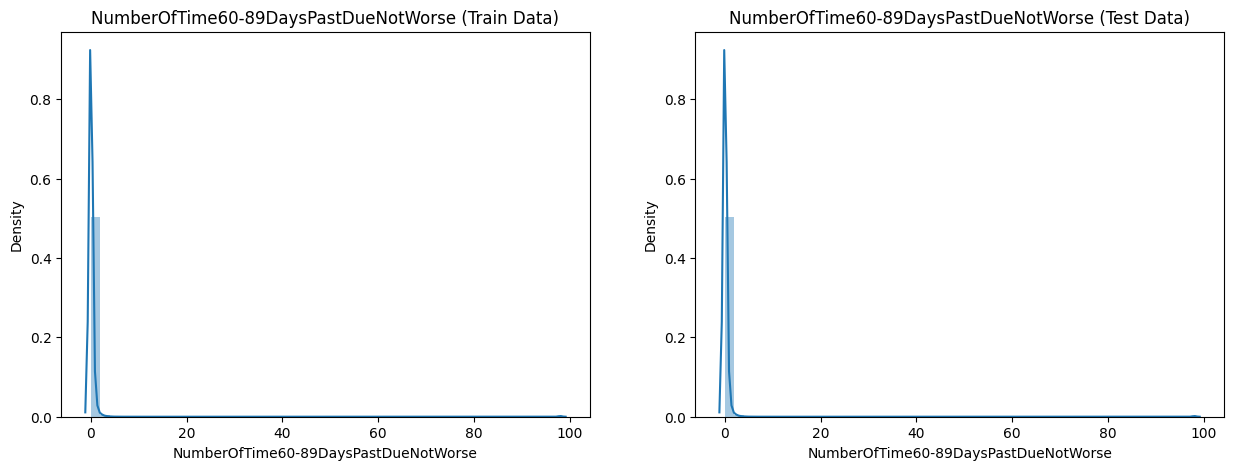

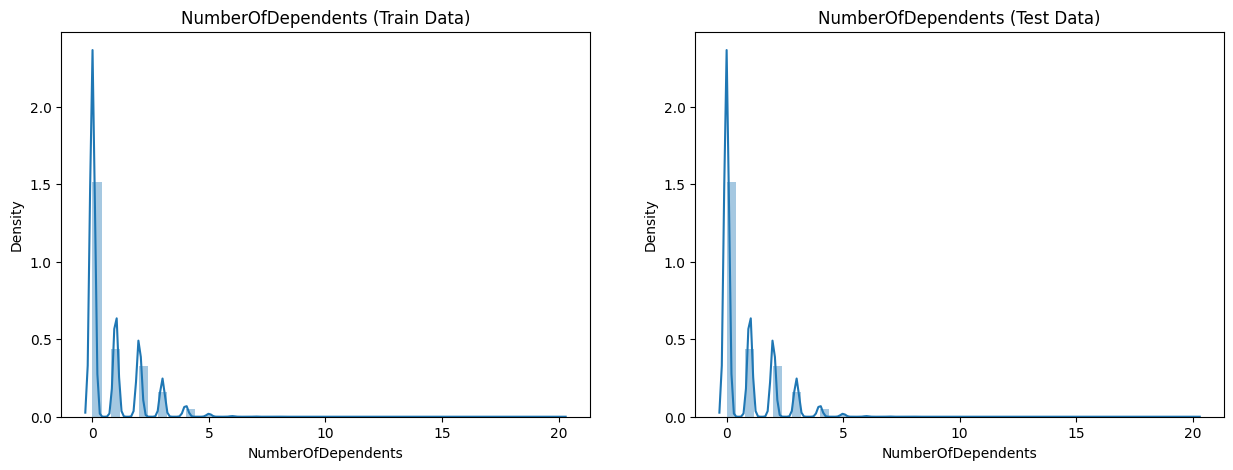

In [ ]:
#Plot the graphs for EDA
Variables= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']
for i in Variables:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Train Data)')
    sns.distplot(new_data[i], ax=axes[0])
    axes[1].set_title(i+' (Test Data)')
    sns.distplot(new_data[i], ax=axes[1])

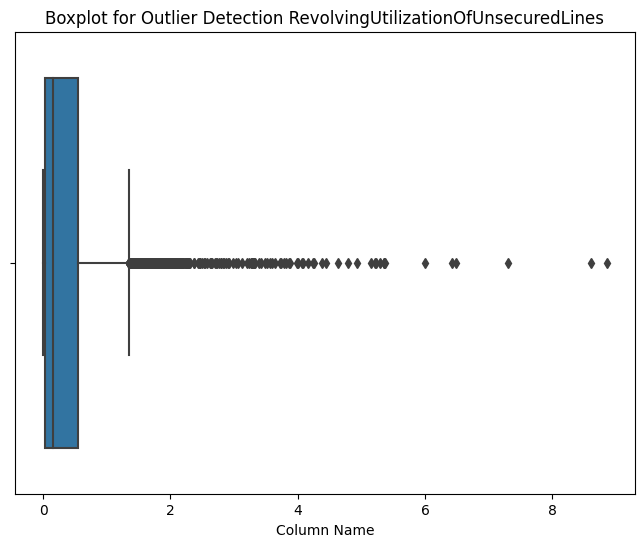

In [ ]:
# Create a boxplot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_data['RevolvingUtilizationOfUnsecuredLines'])

# Add labels and a title
plt.xlabel('Column Name')
plt.title('Boxplot for Outlier Detection RevolvingUtilizationOfUnsecuredLines')

# Show the plot
plt.show()

Since the column RevolvingUtilizationOfUnsecuredLines is a percentage value, checking outliers which are greater than 1

In [ ]:
(new_data['RevolvingUtilizationOfUnsecuredLines'] <= 1).value_counts()

True     146679
False      3321
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

High number of variables are under Flase. Removing them might affect the data.

In [ ]:
#Checking it with 10
(new_data['RevolvingUtilizationOfUnsecuredLines'] <= 10).value_counts()

True     149759
False       241
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [ ]:
#Removing values which are over 10
new_data = new_data[new_data['RevolvingUtilizationOfUnsecuredLines'] <= 10]

The box plot data shows that there are concentrated data points upto around 20 and then the outliers are from around 90 on the x axis


In [ ]:
(new_data['NumberOfTime30-59DaysPastDueNotWorse']>90).value_counts()

False    149490
True        269
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

To check if we can remove these outliers, we need to check the effect of it on the target variable

In [ ]:
new_data[new_data['NumberOfTime30-59DaysPastDueNotWorse']>90].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    122
1    147
dtype: int64

Thats a good number of people who fall under deafulters - We cannot just remove this data.

In [ ]:
#We will deal with it with Winsorization
q95 = new_data['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.95)
q5 = new_data['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.05)

new_data['NumberOfTime30-59DaysPastDueNotWorse'] = new_data['NumberOfTime30-59DaysPastDueNotWorse'].clip(lower=q5, upper=q95)

q95 = new_data['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.95)
q5 = new_data['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.05)

new_data['NumberOfTime60-89DaysPastDueNotWorse'] = new_data['NumberOfTime60-89DaysPastDueNotWorse'].clip(lower=q5, upper=q95)


q95 = new_data['NumberOfTimes90DaysLate'].quantile(0.95)
q5 = new_data['NumberOfTimes90DaysLate'].quantile(0.05)

new_data['NumberOfTimes90DaysLate'] = new_data['NumberOfTimes90DaysLate'].clip(lower=q5, upper=q95)

In [ ]:
new_data[new_data['DebtRatio']>3500]['SeriousDlqin2yrs'].describe()

count    3705.000000
mean        0.064777
std         0.246166
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
#Appplying winsorization for outliers
q95 = new_data['DebtRatio'].quantile(0.95)
q5 = new_data['DebtRatio'].quantile(0.05)

new_data['DebtRatio'] = new_data['DebtRatio'].clip(lower=q5, upper=q95)


In [ ]:
new_data.groupby('SeriousDlqin2yrs').size()/new_data.shape[0]

SeriousDlqin2yrs
0    0.933166
1    0.066834
dtype: float64

**Model building**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

xgModel = XGBClassifier(tree_method = 'exact')

x_train = new_data.drop(['SeriousDlqin2yrs','Unnamed: 0'],axis=1)
y_train = new_data['SeriousDlqin2yrs'].copy()

xgModel.fit(x_train,y_train.values.ravel())
y_pred=xgModel.predict(x_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139750
           1       0.76      0.27      0.40     10009

    accuracy                           0.95    149759
   macro avg       0.86      0.63      0.69    149759
weighted avg       0.94      0.95      0.93    149759



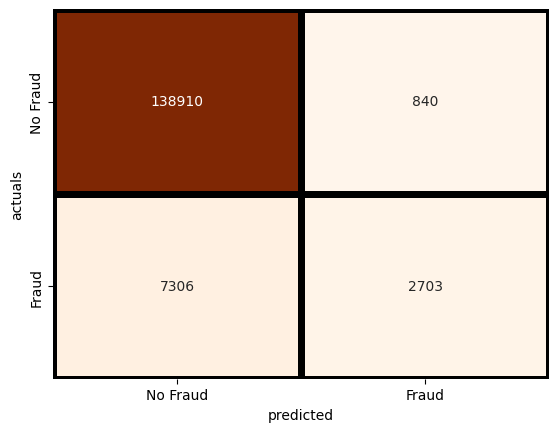

In [ ]:
accuracy_score(y_train, y_pred)

cm_values = confusion_matrix(y_train, y_pred)

sns.heatmap(cm_values,cmap='Oranges',annot=True,fmt='d',cbar=False,linecolor='Black',linewidths=5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

print(classification_report(y_train, y_pred))

Inferences:

The model is excellent at predicting the negative class, with high precision and recall, resulting in a high F1-score.

The model's performance on the positive class is not very accurate. While precision is acceptable, recall is low, meaning it doesn't effectively identify all actual class 1 instances. This can be a concern in a credit risk scenario where correctly identifying high-risk customers is critical.

The high overall accuracy is mainly due to the dominance of class 0, and it may not accurately reflect the model's performance on class 1.
There's an imbalance in the model's performance between the two classes, with class 0 being favored.

While the model performs well in predicting class 0, it needs improvement in classifying class 1. We can consider addressing class imbalance, adjusting the model's threshold, or using different techniques to enhance the identification of high-risk customers based on domain knowledge. The choice of action should align with the business objectives and the costs associated with false positives and false negatives in the context of credit risk assessment.